# Phase - 1: Data analysis & preparation


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Viewing the data


In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.shape

(1190, 12)

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [7]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Correlations and data distribution


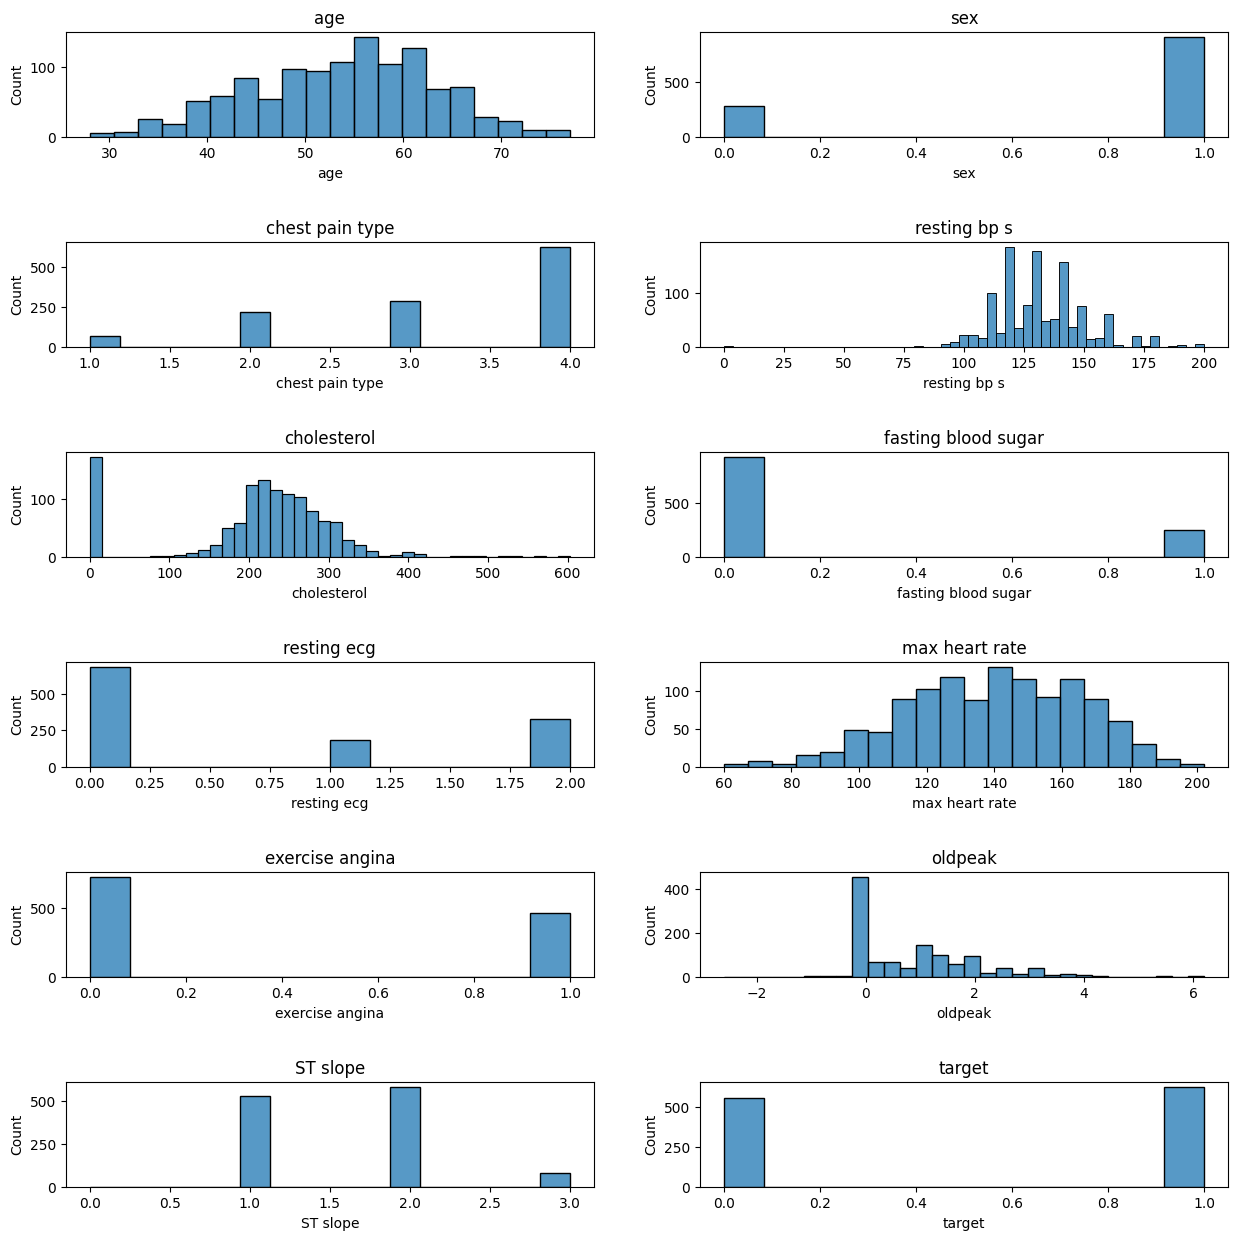

In [8]:
plt.figure(figsize=(15,15))
plt_index = 1
for c_name, content in df.items():
  ax = plt.subplot(6,2, plt_index)
  plt.subplots_adjust(hspace = 1)
  sns.histplot(content, ax=ax)
  plt.title(c_name)
  plt_index += 1

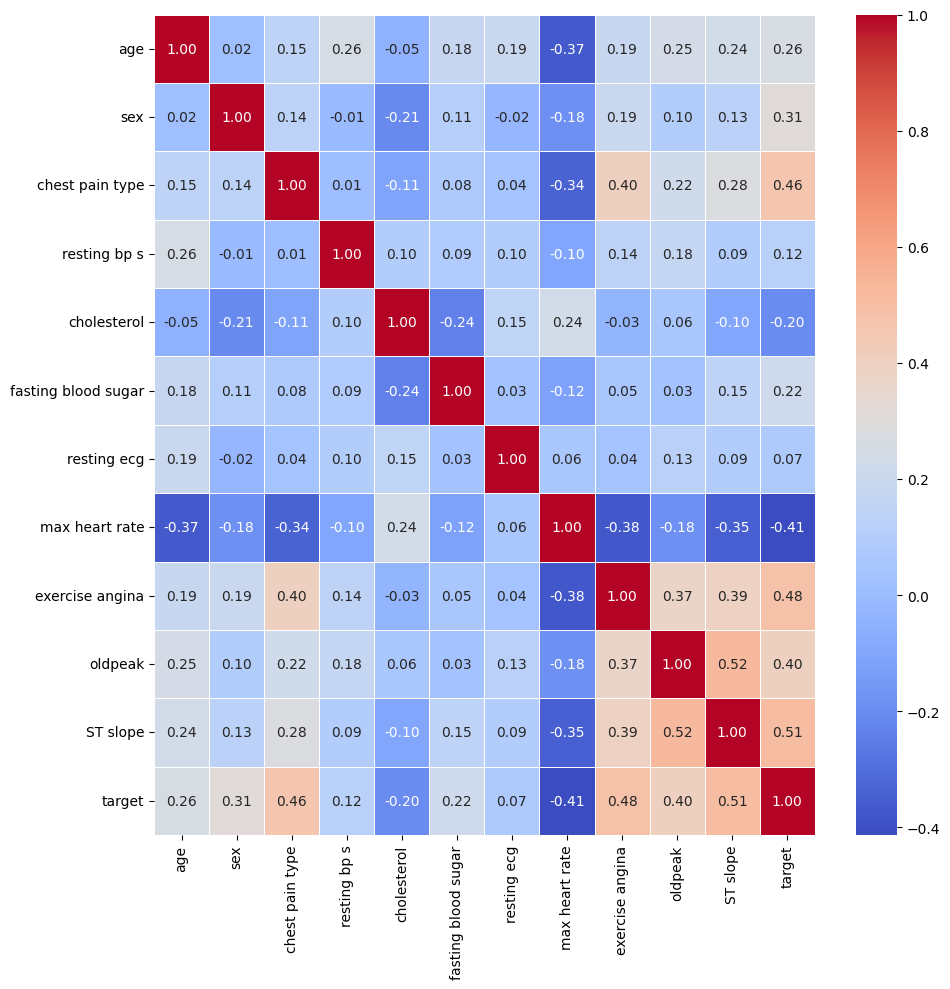

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

In [10]:
df["target"].value_counts()

,count
target,
1,629
0,561


## Shuffle, np conversion, and splitting

In [15]:
# set numpy print options
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [16]:
# convert DF to numpy array for normalizing
np_data = df.to_numpy()
np_data[:5, :]

array([[ 40.00,  1.00,  2.00,  140.00,  289.00,  0.00,  0.00,  172.00,
         0.00,  0.00,  1.00,  0.00],
       [ 49.00,  0.00,  3.00,  160.00,  180.00,  0.00,  0.00,  156.00,
         0.00,  1.00,  2.00,  1.00],
       [ 37.00,  1.00,  2.00,  130.00,  283.00,  0.00,  1.00,  98.00,
         0.00,  0.00,  1.00,  0.00],
       [ 48.00,  0.00,  4.00,  138.00,  214.00,  0.00,  0.00,  108.00,
         1.00,  1.50,  2.00,  1.00],
       [ 54.00,  1.00,  3.00,  150.00,  195.00,  0.00,  0.00,  122.00,
         0.00,  0.00,  1.00,  0.00]])

In [12]:
import random
np.random.shuffle(np_data)

In [13]:
# just checking shuffle
np_data[:5, :]

array([[ 47. ,   1. ,   2. , 160. , 263. ,   0. ,   0. , 174. ,   0. ,
          0. ,   1. ,   0. ],
       [ 29. ,   1. ,   2. , 140. , 263. ,   0. ,   0. , 170. ,   0. ,
          0. ,   1. ,   0. ],
       [ 65. ,   1. ,   1. , 138. , 282. ,   1. ,   2. , 174. ,   0. ,
          1.4,   2. ,   1. ],
       [ 44. ,   1. ,   4. , 110. , 197. ,   0. ,   2. , 177. ,   0. ,
          0. ,   1. ,   1. ],
       [ 38. ,   1. ,   1. , 120. , 231. ,   0. ,   0. , 182. ,   1. ,
          3.8,   2. ,   1. ]])

In [14]:
# integer for splitting the data in the next steps
index_20percent = int(0.2 * len(np_data[:, 0]))
index_20percent

238

In [17]:
# remove last column (target)
XVALID = np_data[:index_20percent, :-1]
YVALID = np_data[:index_20percent, -1]

XTRAIN = np_data[index_20percent:, :-1]
YTRAIN = np_data[index_20percent:, -1]

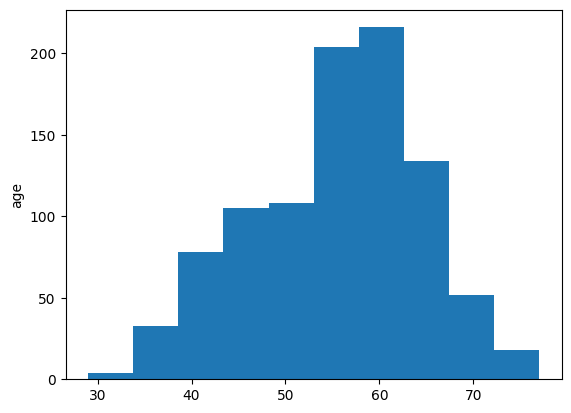

In [18]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('age')
plt.show()

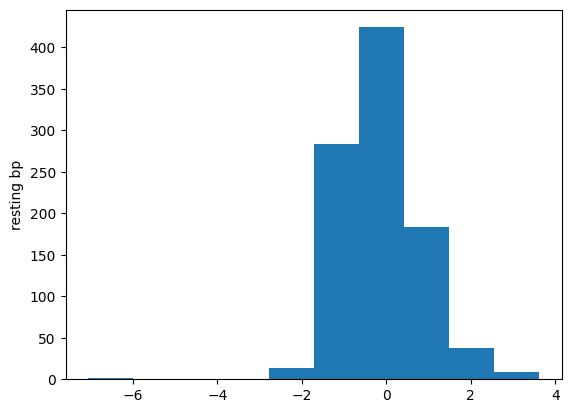

In [22]:
plt.hist(XTRAIN[:, 3])
plt.ylabel('resting bp')
plt.show()

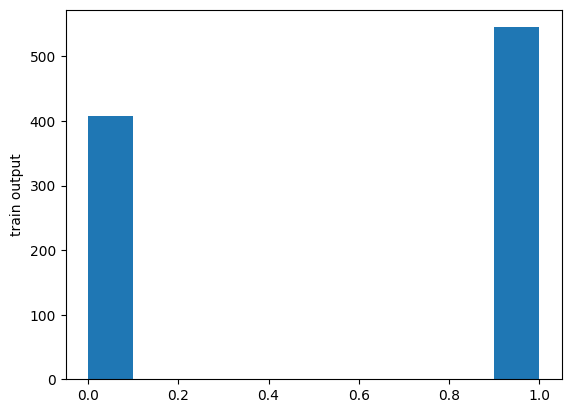

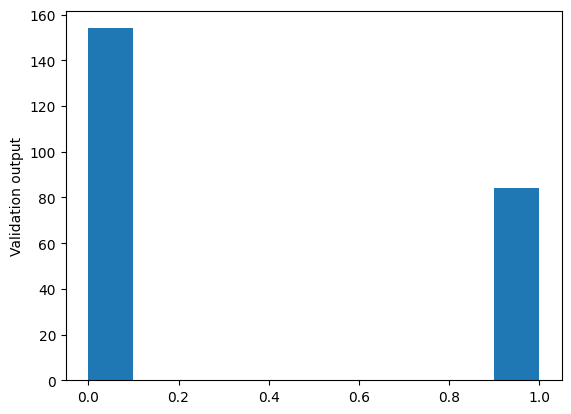

In [19]:
plt.hist(YTRAIN)
plt.ylabel('train output')
plt.show()

plt.hist(YVALID)
plt.ylabel('Validation output')
plt.show()

In [20]:
mean = XTRAIN.mean(axis=0)
std = XTRAIN.std(axis=0)

XTRAIN -= mean
XTRAIN /= std

XVALID -= mean
XVALID /= std

In [21]:
print(mean)
print(std)

[ 55.35  0.77  3.30  132.25  201.46  0.25  0.82  139.76  0.41  1.02  1.67]
[ 8.96  0.42  0.91  18.74  106.41  0.43  0.91  25.88  0.49  1.11  0.63]


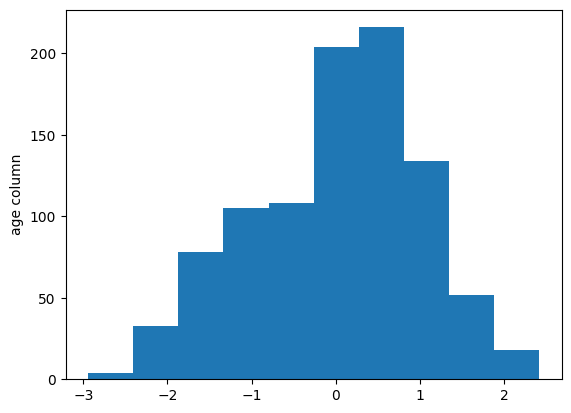

In [23]:
# verify the values are normalize between 0 and 1
plt.hist(XTRAIN[:, 0])
plt.ylabel('age column')
plt.show()

# Phase - 2: Intentional Overfit
- For this phase **do not** split data into training and validation


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [25]:
X = np_data[:, :-1]
Y = np_data[:, -1]

In [26]:
print(X.shape, Y.shape)
print(X.shape[1])

(1190, 11) (1190,)
11


## Overfit with 1 neuron (No overfit ~83% acc)
- 256 epochs

In [27]:
# set up network architecture
model = Sequential(name="overfit_one_neuron")
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [28]:
model.fit(X, Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6083 - loss: 0.6979   
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6609 - loss: 0.6247 
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6820 - loss: 0.6081 
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6861 - loss: 0.5791 
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7304 - loss: 0.5355
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7379 - loss: 0.5006 
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7408 - loss: 0.5144 
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7478 - loss: 0.5077 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 0.4721
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.4678 
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7989 - loss: 0.4463 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

## Overfit with a 2x1 network (No overfit ~85% acc)
- 256 epochs

In [29]:
# add more neurons
overfit_model = Sequential(name="overfit_2x1")
overfit_model.add(Input(shape=(X.shape[1],)))
overfit_model.add(Dense(2, activation='relu'))
overfit_model.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
overfit_model.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5546 - loss: 0.8573   
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5864 - loss: 0.7920  
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.7693
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6561 - loss: 0.7303 
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6641 - loss: 0.7036 
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6900 - loss: 0.6717
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 0.6469
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.6160
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.6023
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.5776
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7876 - loss: 0.5631 
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

## Overfit with 8x1 network (No overfit ~90% acc)
- 256 epochs

In [31]:
# add more neurons
overfit_model_2 = Sequential(name="overfit_8x1")
overfit_model_2.add(Input(shape=(X.shape[1],)))
overfit_model_2.add(Dense(8, activation='relu'))
overfit_model_2.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_2.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3899 - loss: 0.9394   
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4801 - loss: 0.8128
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5581 - loss: 0.7081 
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 0.6354
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.5978
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7225 - loss: 0.5393 
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7373 - loss: 0.5217
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7848 - loss: 0.4697 
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7814 - loss: 0.4552 
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4436
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8166 - loss: 0.4155
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

## Overfit 8x4x1 (No overfit ~90% acc)
- 256 epochs

In [32]:
# add more neurons and another layer
overfit_model_3 = Sequential(name="overfit_8x4x1")
overfit_model_3.add(Input(shape=(X.shape[1],)))
overfit_model_3.add(Dense(8, activation='relu'))
overfit_model_3.add(Dense(4, activation='relu'))
overfit_model_3.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_3.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4919 - loss: 0.7284
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5602 - loss: 0.6887
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - loss: 0.6515
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7164 - loss: 0.6185
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7662 - loss: 0.5856
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7936 - loss: 0.5642
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7835 - loss: 0.5551
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7768 - loss: 0.5423
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.5232
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.5139
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8103 - loss: 0.4968
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

## Overfit 64x4x1 (success)
- 256 epochs

In [ ]:
# add more neurons to first layer
overfit_model_4 = Sequential(name="overfit_64x4x1")
overfit_model_4.add(Input(shape=(X.shape[1],)))
overfit_model_4.add(Dense(64, activation='relu'))
overfit_model_4.add(Dense(4, activation='relu'))
overfit_model_4.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_4.fit(X,Y, epochs=256, verbose=1)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6026 - loss: 0.6562
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.5004
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8183 - loss: 0.4272
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3805
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.3817
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3549
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8390 - loss: 0.3660
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8560 - loss: 0.3303
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8618 - loss: 0.3227
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.3154
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3357
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

## Overfit 64x32x1 (success)
- 100 epochs

In [ ]:
# add more neurons
overfit_model_5 = Sequential(name="overfit_64x32x1")
overfit_model_5.add(Input(shape=(X.shape[1],)))
overfit_model_5.add(Dense(64, activation='relu'))
overfit_model_5.add(Dense(32, activation='relu'))
overfit_model_5.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_5.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_5.fit(X,Y, epochs=100, verbose=1)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7789 - loss: 0.5318
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.4100
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8174 - loss: 0.4027
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.3537
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.3709
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.3563
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8640 - loss: 0.3420
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3139
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8724 - loss: 0.3235
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8871 - loss: 0.3104
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8844 - loss: 0.3084
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

## Overfit 500x1 (success)
- 256 epochs

In [ ]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(500, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7918 - loss: 0.4843
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.4020
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3304
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.3410
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8451 - loss: 0.3381
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8775 - loss: 0.3012
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8831 - loss: 0.3265
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3396
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.3190
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3186
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.3075
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5311 - loss: 0.6779
Epoch 2/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5618 - loss: 0.6437
Epoch 3/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 0.6067
Epoch 4/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.5339
Epoch 5/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.5193
Epoch 6/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4883
Epoch 7/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8107 - loss: 0.4570
Epoch 8/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8070 - loss: 0.4764
Epoch 9/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.4292
Epoch 10/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.4338
Epoch 11/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8282 - loss: 0.4192
Epoch 12/256
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

# Phase 3 - Model selection & evaluation
- Goal: obtain highest possible acc on validation set

In [44]:
from tensorflow.keras.metrics import Precision, Recall, F1Score

In [33]:
# double check train and validation sets
print(XTRAIN.shape, YTRAIN.shape)
print(XVALID.shape, YVALID.shape)

(952, 11) (952,)
(238, 11) (238,)


## Create metric classes and model callbacks
- Accuracy, Precision, Recall, F1Score

In [35]:
prec = Precision()
rec = Recall()
f1 = F1Score()

In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath = 'model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')

## Create a neural network logistic regression model
- One output neuron with sigmoid
- val_accuracy: 0.8403
- val_loss: 0.3612
- val_precision: 0.7949
- val_recall: 0.7381


In [46]:
baseline_regression_model = Sequential(name="baseline_regression_model")
baseline_regression_model.add(Input(shape=(X.shape[1],)))
baseline_regression_model.add(Dense(1, activation='sigmoid'))
# compile the model
baseline_regression_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])


In [48]:
history = baseline_regression_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 24s 858ms/step - accuracy: 0.3750 - loss: 1.0982 - precision: 0.7391 - recall: 0.6667
Epoch 1: val_loss improved from -inf to 0.94251, saving model to model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5311 - loss: 0.8609 - precision: 0.6569 - recall: 0.5975 - val_accuracy: 0.4538 - val_loss: 0.9425 - val_precision: 0.3777 - val_recall: 0.8452
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6562 - loss: 0.6601 - precision: 0.7500 - recall: 0.7826
Epoch 2: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 0.7861 - precision: 0.6472 - recall: 0.6036 - val_accuracy: 0.4664 - val_loss: 0.8920 - val_precision: 0.3838 - val_recall: 0.8452
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4688 - loss: 0.7871 - precision: 0.6667 - recall: 0.4545
Epoch 3: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5947 - los

## Model 32-16-8-1
- val_accuracy: 0.8445
- val_loss: 0.3718
- val_precision: 0.8133
- val_recall: 0.7262

In [49]:
four_layer_model = Sequential(name="32x16x8x1_model")
four_layer_model.add(Input(shape=(X.shape[1],)))
four_layer_model.add(Dense(32, activation='relu'))
four_layer_model.add(Dense(16, activation='relu'))
four_layer_model.add(Dense(8, activation='relu'))
four_layer_model.add(Dense(1, activation='sigmoid'))
# compile the model
four_layer_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
four_layer_history = four_layer_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5312 - loss: 0.7499 - precision: 0.7182 - recall: 0.7822
Epoch 1: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5678 - loss: 0.6618 - precision: 0.6131 - recall: 0.9107 - val_accuracy: 0.7773 - val_loss: 0.6104 - val_precision: 0.6202 - val_recall: 0.9524
Epoch 2/256
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7557 - loss: 0.5389 - precision: 0.7166 - recall: 0.9495  
Epoch 2: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7607 - loss: 0.5379 - precision: 0.7226 - recall: 0.9470 - val_accuracy: 0.8445 - val_loss: 0.5260 - val_precision: 0.7975 - val_recall: 0.7500
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7812 - loss: 0.4986 - precision: 0.7600 - recall: 0.9500
Epoch 3: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8034 - loss: 0.4898 - precision: 0.7950 - 

## Model 16x8x1
- val_accuracy: 0.8739
- val_loss: 0.3006
- val_precision: 0.8375
- val_recall: 0.7976



In [50]:
three_layer_model = Sequential(name="16x8x1_model")
three_layer_model.add(Input(shape=(X.shape[1],)))
three_layer_model.add(Dense(16, activation='relu'))
three_layer_model.add(Dense(8, activation='relu'))
three_layer_model.add(Dense(1, activation='sigmoid'))
# compile the model
three_layer_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
three_layer_history = three_layer_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6562 - loss: 0.6345 - precision: 0.7624 - recall: 0.7624
Epoch 1: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6929 - loss: 0.5986 - precision: 0.6992 - recall: 0.8673 - val_accuracy: 0.6303 - val_loss: 0.6498 - val_precision: 0.4872 - val_recall: 0.9048
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6562 - loss: 0.5862 - precision: 0.7619 - recall: 0.7273
Epoch 2: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7783 - loss: 0.5257 - precision: 0.7715 - recall: 0.8949 - val_accuracy: 0.7395 - val_loss: 0.5569 - val_precision: 0.5902 - val_recall: 0.8571
Epoch 3/256
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4836 - precision: 0.7795 - recall: 0.8989 
Epoch 3: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.4832 - precision: 0.7802 - r

## Model 8x1
- val_accuracy: 0.8529
- val_loss: 0.3429
- val_precision: 0.8025
- val_recall: 0.7738

In [51]:
eightx1_model = Sequential(name="8x1_model")
eightx1_model.add(Input(shape=(X.shape[1],)))
eightx1_model.add(Dense(8, activation='relu'))
eightx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
eightx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
eightx1_history = eightx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2812 - loss: 0.8406 - precision: 0.7292 - recall: 0.7216
Epoch 1: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3214 - loss: 0.8329 - precision: 0.5448 - recall: 0.4717 - val_accuracy: 0.3908 - val_loss: 0.8480 - val_precision: 0.3512 - val_recall: 0.8571
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5625 - loss: 0.7126 - precision: 0.6667 - recall: 0.5263
Epoch 2: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4785 - loss: 0.7352 - precision: 0.5368 - recall: 0.5335 - val_accuracy: 0.4538 - val_loss: 0.7560 - val_precision: 0.3850 - val_recall: 0.9167
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5938 - loss: 0.6760 - precision: 0.5600 - recall: 0.8750
Epoch 3: val_loss did not improve from 0.94251
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 0.6694 - precision: 0.6204 - r

## Model 4x1
- val_accuracy: 0.8782
- val_loss: 0.5109
- val_precision: 0.7895
- val_recall: 0.8929

In [52]:
fourx1_model = Sequential(name="4x1_model")
fourx1_model.add(Input(shape=(X.shape[1],)))
fourx1_model.add(Dense(4, activation='relu'))
fourx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
fourx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
fourx1_history = fourx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4375 - loss: 1.3185 - precision: 0.7182 - recall: 0.7822
Epoch 1: val_loss improved from 0.94251 to 1.36787, saving model to model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4720 - loss: 1.0836 - precision: 0.5774 - recall: 0.8241 - val_accuracy: 0.3277 - val_loss: 1.3679 - val_precision: 0.3362 - val_recall: 0.9286
Epoch 2/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5000 - loss: 0.9129 - precision: 0.5000 - recall: 1.0000
Epoch 2: val_loss did not improve from 1.36787
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5114 - loss: 0.9094 - precision: 0.5442 - recall: 0.8824 - val_accuracy: 0.3361 - val_loss: 1.1743 - val_precision: 0.3419 - val_recall: 0.9524
Epoch 3/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5312 - loss: 0.8648 - precision: 0.5357 - recall: 0.8824
Epoch 3: val_loss did not improve from 1.36787
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5261 - los

## Model 2x1
- val_accuracy: 0.7983
- val_loss: 0.4764
- val_precision: 0.7308
- val_recall: 0.6786

In [53]:
twox1_model = Sequential(name="2x1_model")
twox1_model.add(Input(shape=(X.shape[1],)))
twox1_model.add(Dense(2, activation='relu'))
twox1_model.add(Dense(1, activation='sigmoid'))
# compile the model
twox1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
twox1_history = twox1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5312 - loss: 0.8544 - precision: 0.7895 - recall: 0.7576
Epoch 1: val_loss did not improve from 1.36787
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3953 - loss: 0.9931 - precision: 0.5994 - recall: 0.4046 - val_accuracy: 0.5630 - val_loss: 0.8076 - val_precision: 0.1154 - val_recall: 0.0357
Epoch 2/256
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3943 - loss: 0.9122 - precision: 0.4486 - recall: 0.2408 
Epoch 2: val_loss did not improve from 1.36787
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3980 - loss: 0.9096 - precision: 0.4540 - recall: 0.2454 - val_accuracy: 0.5882 - val_loss: 0.7604 - val_precision: 0.2500 - val_recall: 0.0833
Epoch 3/256
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4243 - loss: 0.8901 - precision: 0.4517 - recall: 0.2469 
Epoch 3: val_loss did not improve from 1.36787
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4320 - loss: 0.8718 - precision: 0.4754 - r

In [56]:
twox1_history.params

{'verbose': 1, 'epochs': 256, 'steps': 30}

## Plot learning curves

In [57]:
def plot_learning_curves(history, title):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title(title)
  plt.legend(['training data', 'validation data'], loc='lower right')
  plt.show()

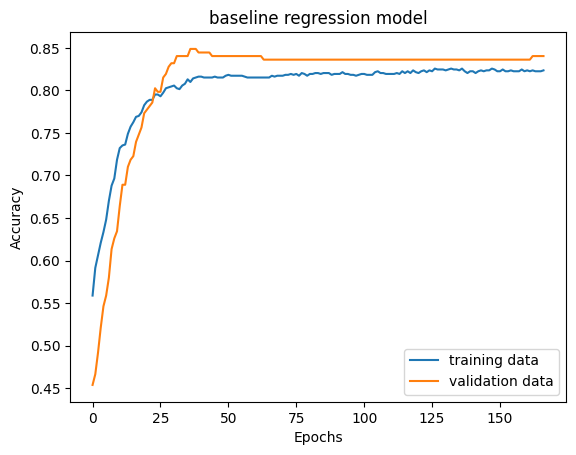

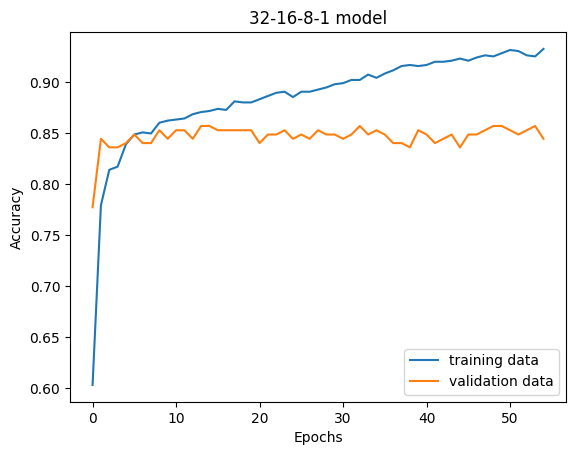

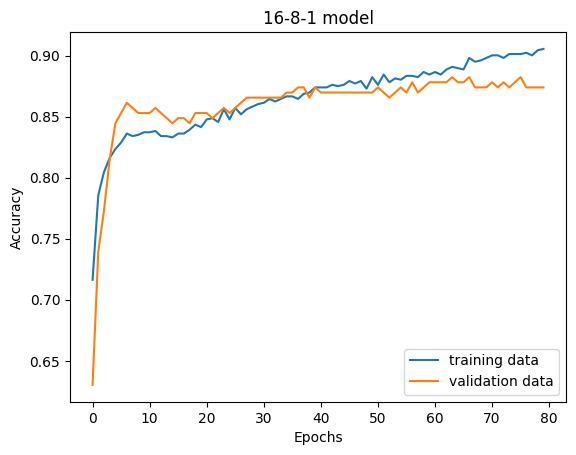

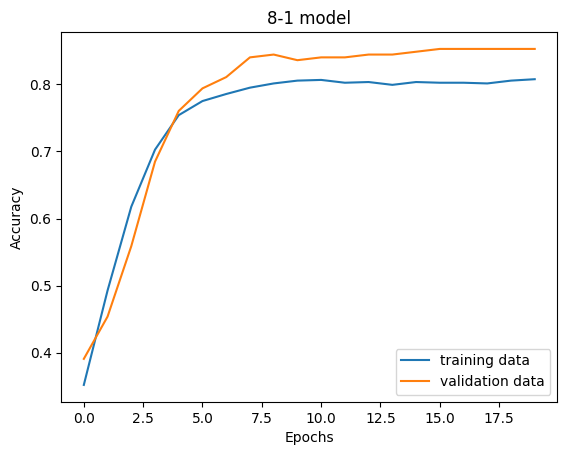

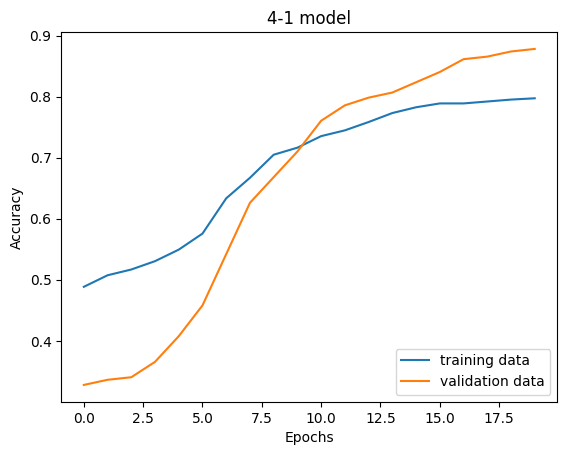

In [58]:
plot_learning_curves(history, "baseline regression model")
plot_learning_curves(four_layer_history, "32-16-8-1 model")
plot_learning_curves(three_layer_history, "16-8-1 model")
plot_learning_curves(eightx1_history, "8-1 model")
plot_learning_curves(fourx1_history, "4-1 model")